# Домашнее задание

# Часть 1
Предварительный анализ

In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# попутно разбираюсь с google disk
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# %cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [176]:
# загружаю данные
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


смотрим

In [177]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

выясним в интернете, что означает каждый признак

PassengerId — числовой идентификатор, присвоенный каждому пассажиру.
Survived — признак, показывающий, выжил ли пассажир (1) или нет (0).
Pclass — класс билета (1 — высший, 2 — средний, 3 — низший).
Name — имя и фамилия пассажира и ещё дополнительная информация.
Sex — пол пассажира.
Age — возраст пассажира.
SibSp — наличие братьев и сестёр или супругов на борту «Титаника».
Parch — наличие родителей или детей на борту «Титаника».
Ticket — номер билета пассажира.
Fare — сколько пассажир заплатил за билет (в фунтах).
Cabin — номер каюты — отсек корабля (буквы A, B, C, D и цифры).
Embarked — в каком порту пассажир зашёл на «Титаник» (C — Шербур, Q — Квинстаун, S — Саутгемптон)

для предварительного анализы выберу наиболее существенные на мой взгляд параметры

судя по известному фильму на корабле в первую очередь спасали:
1 женщин
2 детей
3 пассажиров с верхних палуб
также предполагаю, что:
4 пассажиры с более высокин достатком также имели преимущества.
по крайней мере в части спасения своих жен и детей
5 женщины с детьми имели более высокий приоритем по сравнению с другими женщинами
6 семьи вели себя более организованно и имели больше шансов на спасение (опять таки
хотя бы с части спасения женщин и детей)

проанализируем наши признаки

PassengerId - исключаю
Survived - целевой признак
Pclass - оставляю. считаю, что с этим признаком проще работать чем с Fare
Name - исключаю
Sex - оставляю. очень важный признак
Age - оставляю
SibSp - исключаю. считаю, что следующий признак более важный
Parch - оставляю
Ticket - исключаю. вся значимая информация есть в следующем признаке
Fare - исключаю (оставил тип каюты)
Cabin - исключаю. считаю, что класс каюты определяется ценой за билет
Embarked - исключаю
смотрим, что осталось

In [178]:
data_1 = data[['Survived', 'Sex', 'Age', 'Parch', 'Fare']]
data_1.head()

,Survived,Sex,Age,Parch,Fare
0,0,male,22.0,0,7.2500
1,1,female,38.0,0,71.2833
2,1,female,26.0,0,7.9250
3,1,female,35.0,0,53.1000
4,0,male,35.0,0,8.0500


In [179]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [180]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
# удалим строки с NaN
data_1 = data_1.dropna()
data_1.head()

,Survived,Sex,Age,Parch,Fare
0,0,male,22.0,0,7.2500
1,1,female,38.0,0,71.2833
2,1,female,26.0,0,7.9250
3,1,female,35.0,0,53.1000
4,0,male,35.0,0,8.0500


In [182]:
# преобразуем М/Ж к более привычным 1/0 )
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [183]:
le.fit(data_1['Sex'])

LabelEncoder()

In [184]:
data_1['Sex'] = le.fit_transform(data_1['Sex'])
data_1.head()

,Survived,Sex,Age,Parch,Fare
0,0,1,22.0,0,7.2500
1,1,0,38.0,0,71.2833
2,1,0,26.0,0,7.9250
3,1,0,35.0,0,53.1000
4,0,1,35.0,0,8.0500


итого в нашей упрощенной задачи остолось 4 параметра
попробуем это визуализировать

In [ ]:
f = plt.figure()
f.clear()
plt.close(f)

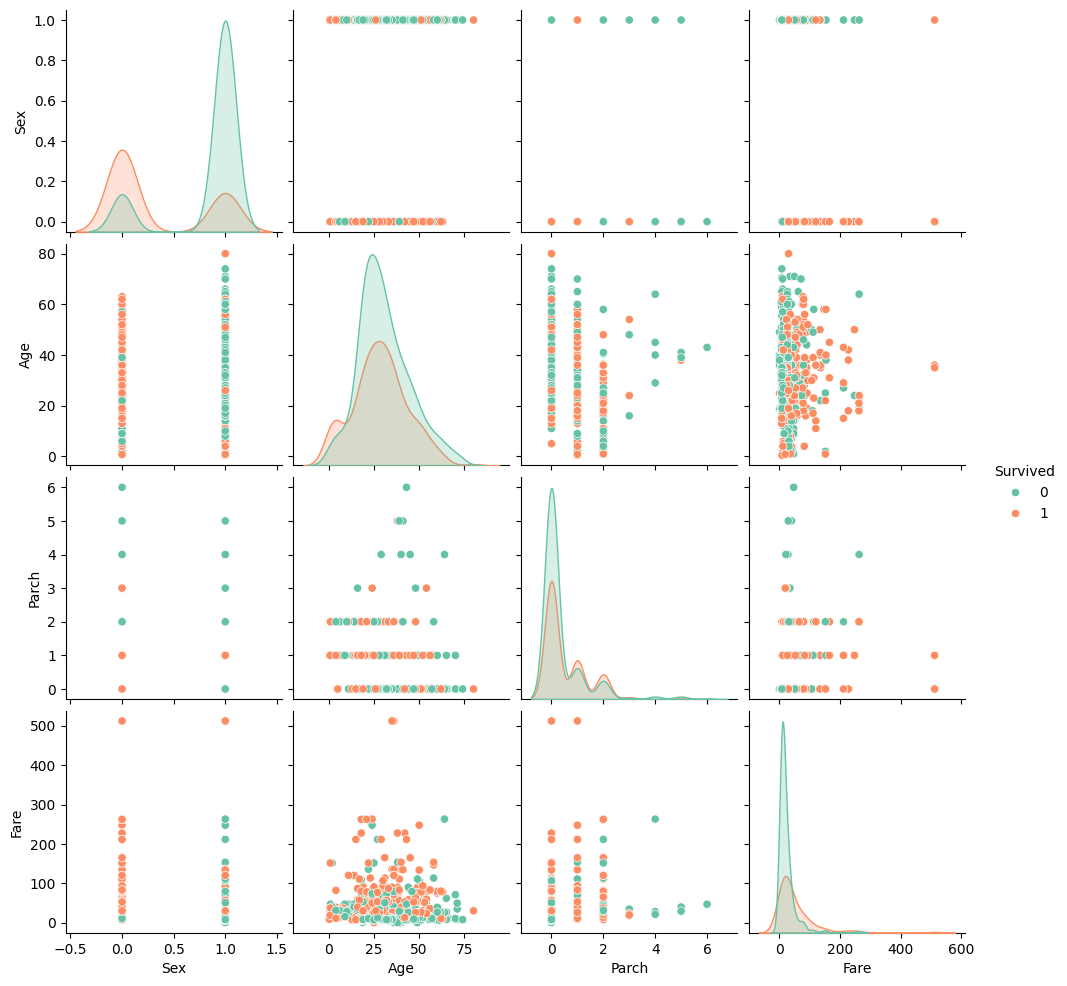

In [209]:
import seaborn as sns

sns.pairplot(data=data_1, hue='Survived', palette="Set2")

т к почти все признаки 0/1 то ни чего и не видно
попробую немного преобразовать

In [199]:
plt.close()

In [200]:
data_visual = data_1
data_visual.head()

,Survived,Sex,Age,Parch,Fare
0,0,1,22.0,0,7.2500
1,1,0,38.0,0,71.2833
2,1,0,26.0,0,7.9250
3,1,0,35.0,0,53.1000
4,0,1,35.0,0,8.0500


In [201]:
# удалим целевой столбец
data_visual = data_visual.drop(['Survived'], axis=1)
data_visual.head()

,Sex,Age,Parch,Fare
0,1,22.0,0,7.2500
1,0,38.0,0,71.2833
2,0,26.0,0,7.9250
3,0,35.0,0,53.1000
4,1,35.0,0,8.0500


In [202]:
# для лучшей визуализации добавлю ко всем данныи "случайный шум"
# в интервале (0, 0.9)
data_visual = data_visual.applymap(lambda x: x + np.random.rand()*0.9)

In [203]:
data_visual.head()

,Sex,Age,Parch,Fare
0,1.878794,22.277924,0.363433,8.054636
1,0.733200,38.695633,0.293728,71.597889
2,0.553772,26.112762,0.777749,8.274008
3,0.488476,35.732709,0.073614,53.528135
4,1.250664,35.526455,0.673146,8.052426


вернем снова целевой фрагмент
более короткого пути я не наше)

In [204]:
data_visual.loc[:, 'Survived'] = data_1['Survived']
data_visual.head()

,Sex,Age,Parch,Fare,Survived
0,1.878794,22.277924,0.363433,8.054636,0
1,0.733200,38.695633,0.293728,71.597889,1
2,0.553772,26.112762,0.777749,8.274008,1
3,0.488476,35.732709,0.073614,53.528135,1
4,1.250664,35.526455,0.673146,8.052426,0


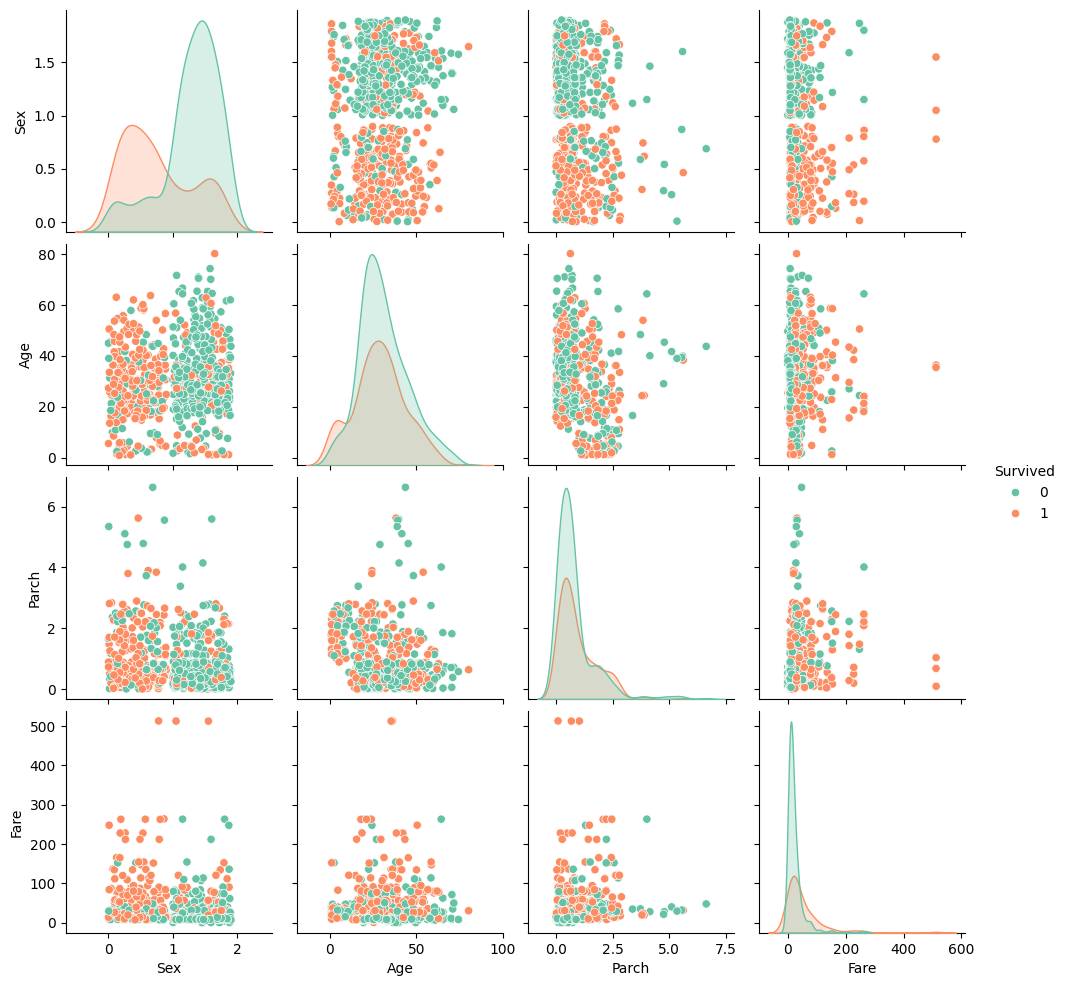

In [206]:
# строим еще раз
f = sns.pairplot(data=data_visual, hue='Survived', palette="Set2")

выводы
1 Sex-Sex: видно самое заметное влияние этого признака по сравнению со всеми остальными
2 Age-Age: видно влияние возраста для детей
3 Sex-Age: доля мальчиков и девочек среди спасенных детей примерно одинаковая
4 Parch-Parch: видно не очень значительное влияние "семейного фактора"
5 Fare-Fare: видно вдияние "фактора денег"
6 (Sex, Age, Parch, Fare) - Fare: правая часть всех правых графиков показывают существенное влияние "фактора денег"
на все остальные параметры с точки зрения выживания на тонущем Титанике
общий вывод:
в целом показатели для оценки ситуации были выбраны верно, хотя разные показатели оказывают разное влияние

ну и последняя визуализация)
удалим Parch. т к его влияние самое не значительное
и посмотрим на это в 3-х измерениях

In [210]:
data_visual = data_visual.drop(['Parch'], axis=1)
data_visual.head()

,Sex,Age,Fare,Survived
0,1.878794,22.277924,8.054636,0
1,0.733200,38.695633,71.597889,1
2,0.553772,26.112762,8.274008,1
3,0.488476,35.732709,53.528135,1
4,1.250664,35.526455,8.052426,0


In [211]:
# подели базу данных выживших и погибших
data_visual_1 = data_visual[data_visual['Survived'] == 1].copy().reset_index(drop=True)
data_visual_1.head()

,Sex,Age,Fare,Survived
0,0.733200,38.695633,71.597889,1
1,0.553772,26.112762,8.274008,1
2,0.488476,35.732709,53.528135,1
3,0.389145,27.004386,11.824067,1
4,0.187350,14.316182,30.619833,1


In [212]:
data_visual_0 = data_visual[data_visual['Survived'] == 0].copy().reset_index(drop=True)
data_visual_0.head()

,Sex,Age,Fare,Survived
0,1.878794,22.277924,8.054636,0
1,1.250664,35.526455,8.052426,0
2,1.650483,54.567927,52.530945,0
3,1.237018,2.249987,21.720076,0
4,1.761824,20.240573,8.721419,0


In [213]:
# !pip install ipympl

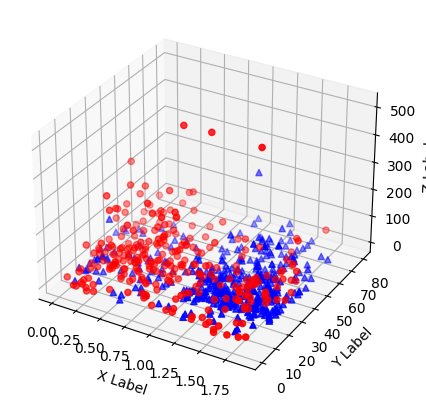

In [214]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
xs_1 = data_visual_1['Sex'].copy()
ys_1 = data_visual_1['Age'].copy()
zs_1 = data_visual_1['Fare'].copy()
#xt_1 = data_visual['Survived'].copy()
#yt = data_visual['Survived'].copy()
#zt = data_visual['Survived'].copy()

xs_2 = data_visual_0['Sex'].copy()
ys_2 = data_visual_0['Age'].copy()
zs_2 = data_visual_0['Fare'].copy()

ax.scatter(xs_1, ys_1, zs_1, c='r', marker='o')
ax.scatter(xs_2, ys_2, zs_2, c='b', marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()



```
# Выбран кодовый формат
```
при желании это все можно и повращать.
но я этот блок кода убрал.
после вращения у меня все последующие рисунки слетали.
а как почистить память я не разобрался)

посмотрим, что покажет нам эта очень упрощенная модель
подготовим данные

In [215]:
X = data_visual[['Sex', 'Age', 'Fare']]
X.head()

,Sex,Age,Fare
0,1.878794,22.277924,8.054636
1,0.733200,38.695633,71.597889
2,0.553772,26.112762,8.274008
3,0.488476,35.732709,53.528135
4,1.250664,35.526455,8.052426


In [216]:
Y = data_visual['Survived']
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Логистическая регрессия

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [220]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [221]:
# посмотрим, что получилось
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 70.63%


In [222]:
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

Precision: 64.00%


In [223]:
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

Recall: 57.14%


все плохо, но лучше чем ни чего)

SVM

In [224]:
from sklearn.svm import SVC

In [225]:
model =  SVC()
model.fit(X_train, y_train)

SVC()

In [226]:
# посмотрим, что получилось
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 61.54%


In [227]:
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

Precision: 51.35%


In [228]:
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

Recall: 33.93%


тоже все плохо)
данных явно не хватает

# Часть 2
Работа с пропусками

1. Удаление бесполезных признаков

удаляю следующие признаки как уникальные

PassengerId — числовой идентификатор, присвоенный каждому пассажиру.
Name — имя и фамилия пассажира и ещё дополнительная информация.
Ticket — номер билета пассажира.

In [229]:
data_2 = data.drop(columns=['PassengerId', 'Name', 'Ticket'])
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


2. Посмотрим что получится если просто воспользоваться get_dummies
и удалить все пустые значения

In [230]:
col_dummies = ['Sex', 'Cabin', 'Embarked']
data_dummies = pd.get_dummies(data=data_2, columns=col_dummies)

In [231]:
data_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [232]:
# удалим строки с NaN
data_dummies = data_dummies.dropna()
data_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [233]:
X = data_dummies.drop(['Survived'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [234]:
Y = data_dummies['Survived']
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [236]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [237]:
# посмотрим, что получилось
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 74.83%


In [238]:
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))

Precision: 69.23%


In [239]:
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

Recall: 64.29%


уже лучше

сейчас пройдемся по каждому параметру

смотрим где у нас есть пропуски

In [240]:
data_2.shape

(891, 9)

In [241]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [242]:
# найдем все строки с пропущенными значениями
data_2[data_2.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


1 Age

In [243]:
data_2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


очень много пропусков - 177

для решения вопроса пропуска Age воспользуемся параметром Name

In [244]:
data_Name = data.copy(deep=True)
data_Name.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


и извлечем из него признаки Miss/Mrs/Mr

In [245]:
data_Name['Salutation'] = data_Name.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
data_Name.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [246]:
#  строки с пропущенным значением Age
data_Name[data_Name['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss


начнем с Miss

In [247]:
Age_Miss = data_Name[(data_Name['Age'].notna()) & (data_Name['Salutation'] == 'Miss')]
Age_Miss.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss


In [248]:
# для поиска выбросов врспользуемся boxplot
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass

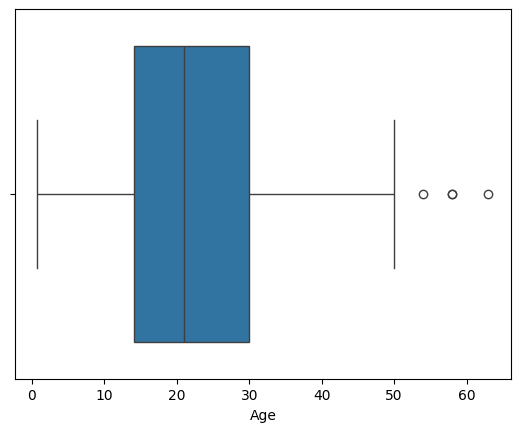

In [249]:
# проверим выбросы
get_boxplot(Age_Miss, columns=['Age'])

действительно, выше в базе Age_Miss показана одна из Miss, которой 58 лет

найдем все 3 выброса

In [ ]:
Age_Miss[(Age_Miss['Age'] > 55)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Miss
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,Miss


удалим этих Miss

In [ ]:
Age_Miss.drop(Age_Miss[ Age_Miss['Age'] > 55 ].index, inplace = True)
Age_Miss.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Miss


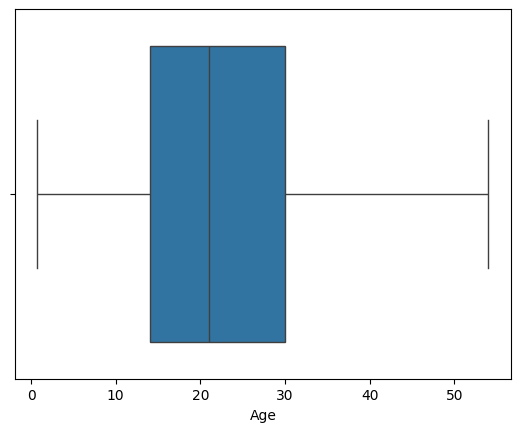

In [ ]:
# посмотрим, что получилось
get_boxplot(Age_Miss, columns=['Age'])

очень даже хорошо

рассчитаем median()

In [ ]:
Age_Miss['Age'].median()

21.0

вот это очень походит на правду походит
оставим

Mrs

In [ ]:
Age_Mrs = data_Name[(data_Name['Age'].notna()) & (data_Name['Salutation'] == 'Mrs')]
Age_Mrs.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs


In [ ]:
# проверим выбросы
get_boxplot(Age_Mrs, columns=['Age'])

тут все логично

In [ ]:
Age_Mrs['Age'].median()

35.0

Mr

In [ ]:
Age_Mr = data_Name[(data_Name['Age'].notna()) & (data_Name['Salutation'] == 'Mr')]
Age_Mr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Mr


In [ ]:
# проверим выбросы
get_boxplot(Age_Mr, columns=['Age'])

в данном случае оставлю все как есть

In [ ]:
Age_Mr['Age'].median()

30.0

подставим полученные значения в пропуски Age
и сразу выборочно проверим

In [ ]:
# Miss

In [ ]:
# было
data_2.loc[[863]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
863,0,3,female,NaN,8,2,69.55,NaN,S


In [ ]:
data_2.loc[(data_2['Age'].isnull()) & (data_Name['Salutation'] == 'Miss'), 'Age'] = 21.0

In [ ]:
# стало
data_2.loc[[863]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
863,0,3,female,21.0,8,2,69.55,NaN,S


In [ ]:
# Mrs

In [ ]:
# было
data_2.loc[[19]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
19,1,3,female,NaN,0,0,7.225,NaN,C


In [ ]:
data_2.loc[(data_2['Age'].isnull()) & (data_Name['Salutation'] == 'Mrs'), 'Age'] = 35.0

In [ ]:
# стало
data_2.loc[[19]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
19,1,3,female,35.0,0,0,7.225,NaN,C


In [ ]:
# Mr

In [ ]:
# было
data_2.loc[[26]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
26,0,3,male,NaN,0,0,7.225,NaN,C


In [ ]:
data_2.loc[(data_2['Age'].isnull()) & (data_Name['Salutation'] == 'Mr'), 'Age'] = 35.0

In [ ]:
# стало
data_2.loc[[26]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
26,0,3,male,35.0,0,0,7.225,NaN,C


2 Pclass

пропусков нет

3 Sex

пропусков нет
НО я предлагаю резделить male/female на male/female/child

In [ ]:
# было
data_2.loc[[14]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
14,0,3,female,14.0,0,0,7.8542,NaN,S


In [ ]:
data_2.loc[(data_2['Age'] <= 16), 'Sex'] = 'child'

In [ ]:
# стало
data_2.loc[[14]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
14,0,3,child,14.0,0,0,7.8542,NaN,S


4 SibSp - пропусков нет

5 Parch - пропусков нет

6 Fare - пропусков нет

7 Cabin

самое большое количество пропусков - 687

наверное при желании можно как-то уточнить это по билете. но я не вижу вообще ни какой закономерности

так как пропусков много и они явно важны я создаю новое значение параметра Cabin - 'No number'

In [ ]:
# было
data_2.loc[[13]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
13,0,3,male,39.0,1,5,31.275,NaN,S


In [ ]:
data_2.loc[(data_2['Cabin'].isnull()), 'Cabin'] = 'No number'

In [ ]:
# стало
data_2.loc[[13]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
13,0,3,male,39.0,1,5,31.275,No number,S


8 Embarked - пропущено 2 значения

In [ ]:
# посмотрим какие данные есть в Embarked
data_2['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

не буду долго думать и подставлю - S

In [ ]:
#  строки с пропущенным значением Embarked
data_Name[data_Name['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [ ]:
# было
data_2.loc[[61]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN


In [ ]:
data_2.loc[(data_2['Embarked'].isnull()), 'Embarked'] = 'S'

In [ ]:
# стало
data_2.loc[[61]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,S


итак, наша итоговая база

In [ ]:
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No number,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,No number,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,No number,S


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       886 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


начнем готовить данные обучению модели

In [ ]:
# Pclass
data_2['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
# создадим для дальнейшей работы базу выживших пассажиров
Survived_1 = data_2[data_2['Survived'] == 1]
Survived_1['Pclass'].value_counts()
Survived_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,No number,S
3,1,1,female,35.0,1,0,53.1000,C123,S
8,1,3,female,27.0,0,2,11.1333,No number,S
9,1,2,child,14.0,1,0,30.0708,No number,C


In [ ]:
# и базу погибших пассажиров
Survived_0 = data_2[data_2['Survived'] == 0]
Survived_0['Pclass'].value_counts()
Survived_0.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No number,S
4,0,3,male,35.0,0,0,8.0500,No number,S
5,0,3,male,35.0,0,0,8.4583,No number,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,child,2.0,3,1,21.0750,No number,S


In [ ]:
# функция для подсчета выживших по данному параметру
def who_survived (parameter):

    keys = data_2[parameter].unique()
    print(keys)
    for key in keys:
        print ('{}={}'.format(parameter, key))
        _0 = Survived_0[lambda x: Survived_0[parameter] == key]
        _1 = Survived_1[lambda x: Survived_1[parameter] == key]
        _00 = _0[parameter].value_counts()
        _11 = _1[parameter].value_counts()
        try:
            _000 = _00[key]
            _111 = _11[key]
        except:
            print ('ключ {} не обнаружен'.format(key))
        print ('Всего пассажиров: {} Выживших: {} Погибших: {} Процент выживших: {:.2f}'.format((_000+_111), _111, _000, _111/(_000+_111)))

    return

In [ ]:
who_survived(parameter='Pclass')

[3 1 2]
Pclass=3
Всего пассажиров: 491 Выживших: 119 Погибших: 372 Процент выживших: 0.24
Pclass=1
Всего пассажиров: 216 Выживших: 136 Погибших: 80 Процент выживших: 0.63
Pclass=2
Всего пассажиров: 184 Выживших: 87 Погибших: 97 Процент выживших: 0.47


Sex

In [ ]:
who_survived(parameter='Sex')

['male' 'female' 'child']
Sex=male
Всего пассажиров: 526 Выживших: 87 Погибших: 439 Процент выживших: 0.17
Sex=female
Всего пассажиров: 265 Выживших: 200 Погибших: 65 Процент выживших: 0.75
Sex=child
Всего пассажиров: 100 Выживших: 55 Погибших: 45 Процент выживших: 0.55


Cabin

In [ ]:
# who_survived(parameter='Cabin')

ну в общем в части Cabin можно изучать и изучать
но в целом ясно одно: у кого класс каюты был пропущен шансов на спасение было намного меньше
кроме того каждая отдельная каюта ни какой статистической нагрузки не несет
каюты необходимо как-то обобщать. а это уже отдельная задача)

поэтому принимаю решение: все каюты с номерами переименовать в 'Is a number'

In [ ]:
data_2.loc[data_2['Cabin'] != 'No number', 'Cabin'] = 'Is a number'

In [ ]:
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No number,S
1,1,1,female,38.0,1,0,71.2833,Is a number,C
2,1,3,female,26.0,0,0,7.9250,No number,S
3,1,1,female,35.0,1,0,53.1000,Is a number,S
4,0,3,male,35.0,0,0,8.0500,No number,S


с учетом все рассмотренного применяю функцию LabelEncoder для замены Sex / Cabin / Embarked

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data_2['Sex'])
data_2['Sex'] = le.fit_transform(data_2['Sex'])
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,2,22.0,1,0,7.2500,No number,S
1,1,1,1,38.0,1,0,71.2833,Is a number,C
2,1,3,1,26.0,0,0,7.9250,No number,S
3,1,1,1,35.0,1,0,53.1000,Is a number,S
4,0,3,2,35.0,0,0,8.0500,No number,S


In [ ]:
le.fit(data_2['Cabin'])
data_2['Cabin'] = le.fit_transform(data_2['Cabin'])
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,2,22.0,1,0,7.2500,1,S
1,1,1,1,38.0,1,0,71.2833,0,C
2,1,3,1,26.0,0,0,7.9250,1,S
3,1,1,1,35.0,1,0,53.1000,0,S
4,0,3,2,35.0,0,0,8.0500,1,S


In [ ]:
le.fit(data_2['Embarked'])
data_2['Embarked'] = le.fit_transform(data_2['Embarked'])
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,2,22.0,1,0,7.2500,1,2
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,2,35.0,0,0,8.0500,1,2


In [ ]:
# data_2 = data_2.reset_index(drop=True)

In [ ]:
X = data_2.drop(columns=['Survived'])

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,2,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,1,2
3,1,1,35.0,1,0,53.1000,0,2
4,3,2,35.0,0,0,8.0500,1,2


In [ ]:
Y = data_2['Survived']

In [ ]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
data_2.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    bool 
 1   Pclass    891 non-null    bool 
 2   Sex       891 non-null    bool 
 3   Age       891 non-null    bool 
 4   SibSp     891 non-null    bool 
 5   Parch     891 non-null    bool 
 6   Fare      891 non-null    bool 
 7   Cabin     891 non-null    bool 
 8   Embarked  891 non-null    bool 
dtypes: bool(9)
memory usage: 8.0 KB


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
np.isnan(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    bool 
 1   Sex       891 non-null    bool 
 2   Age       891 non-null    bool 
 3   SibSp     891 non-null    bool 
 4   Parch     891 non-null    bool 
 5   Fare      891 non-null    bool 
 6   Cabin     891 non-null    bool 
 7   Embarked  891 non-null    bool 
dtypes: bool(8)
memory usage: 7.1 KB


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
model =  SVC()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values